# Introduction
The goal of this project is to analyze data from the National Parks Service about endangered species in different parks. To accomplish this, data will be prepared, analyzed and plotted in order to better understand the conservation status of the species and answer a few questions:
- What is the distribution of conservation status for the parks?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which birds are the most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `observations.csv` and `species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

## Project scoping
The following four categories will serve as a guide for the project's process and progress. 

### Project goals
The project will be set through the perspective of an analyst for the National Parks Service. The National Parks Service wants to ensure the survival of at-risk species in order to maintain biodiversity in their parks. Therefore, the main objectives of the analysis will be to understand the characteristics of the species and their conservation status, as well as their relationship to the national parks. This presents us with a few questions:

- What is the distribution of conservation status for the parks?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animals are the most and the least prevalent and what is their distribution amongst parks?

### Data
This project uses two datasets in `.csv` formats which were both provided with the project material by Codecademy. One of them contain species information and the other contains observations data. They will be used as the base for our analysis.

### Analysis
In this section we will use descriptive statistics and data visualization techniques to better understand the data. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks.

### Results
Following our analysis, we will use this section to go back to our starting questions and check if we met our objectives. We will also use this part to reflect on our findings, the methods used to analyse data and formulate conclusions.

## Importing modules
We will import here the main modules that will be used for the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
The datasets will be imported as Pandas `Dataframes` so we can analyze them using Python.

**species_info.csv** - contains data about different species and their conservation status<br>
- `category` - class of animal<br>
- `scientific_name` - the scientific name of each species<br>
- `common_name` - the common names of each species<br>
- `conservation_status` - each species’ current conservation status<br>

In [2]:
df_species = pd.read_csv('species_info.csv')
df_species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


**observations.csv** - holds recorded sightings of different species at several national parks for the past 7 days.<br>
- `scientific_name` - the scientific name of each species<br>
- `park_name` - park where species were found<br>
- `observations` - the number of times each species was observed at park<br>

In [3]:
df_observations = pd.read_csv('observations.csv')
df_observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Explore the data

**Data characteristics**<br>
We can begin by checking the shape of the datasets. The `species` dataset has 5,824 rows and 4 columns, and the `observations` dataset has 23,296 rows and 3 columns.<br>

In [4]:
print('species shape:', df_species.shape)
print(df_species.columns)
print('observations shape:', df_observations.shape)
print(df_observations.columns)

species shape: (5824, 4)
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
observations shape: (23296, 3)
Index(['scientific_name', 'park_name', 'observations'], dtype='object')


Now we can have a closer look at the data in each dataset.

**species**<br>
By using the `.describe()` method we can load a few summary statistics.

In [5]:
df_species.loc[:,['category','scientific_name','common_names']].describe()

,category,scientific_name,common_names
count,5824,5824,5824
unique,7,5541,5504
top,Vascular Plant,Castor canadensis,Brachythecium Moss
freq,4470,3,7


The `species` dataset contains information about 5,824 distinct species in 7 unique categories that include both animals and plants. The most populous one is the **Vascular Plant** category, with 4,470 species, and the least represented is the **Reptile** category, with only 79 species.

In [6]:
df_species.category.value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

An important column to be explored is also the **conservation_status** column in the `species` dataset.<br>
It contains 4 categories: 'Species of Concern', 'Endangered', 'Threatened' and 'In Recovery'. Besides these categories, it also contains a `nan` category, which means that the species are without concern. Our dataset contains 5,633 null values.

In [7]:
print('nan values:', df_species.conservation_status.isna().sum())
print(df_species.conservation_status.value_counts())

nan values: 5633
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


In [8]:
print('Parks:', df_observations.park_name.unique())
print('Observed species scientific names:',df_observations.scientific_name.nunique())
print('Total number of observations:', df_observations.observations.sum())

observations_sum = df_observations.groupby('scientific_name').observations.sum().reset_index()
observations_sum = observations_sum.sort_values(by='observations', ascending=False)
observations_sum.head(3)

Parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Observed species scientific names: 5541
Total number of observations: 3314739


,scientific_name,observations
4993,Streptopelia decaocto,1785
2452,Holcus lanatus,1780
1103,Castor canadensis,1725


The `observations` dataset contains a total of 3,314,739 observations of the 5,541 unique species across 4 unique Parks. The most observed species is the **Streptopelia decaocto** with a count of 1,785 observations.<br>
Overall, most observations were made in the **Great Smoky Mountains National Park**.

# Analysis

In the exploration we have found many `nan` values in the **conservation_status** column of the `species` dataset. These values will be replaced with `No Intervention`.

In [9]:
df_species.fillna('No Intervention', inplace=True)
print(df_species.conservation_status.unique())

['No Intervention' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


Next we can start analyzing the different categories that are nested in the `conservation_status` column, except those who require no intervention. Below we have created a table and a barplot to be explored.<br>

We can see that most species fall in the **Species of Concern** category, with most of them being **birds** and **vascular plants**, but mammals also make up an important portion of the species in this category.<br>

If we are to further analyze the table, we can observe that in ply two categories we have registered species that are **in recovery**: birds and mammals. However, birds are more numerous, which might indicate that they have been more able to bounce back as species.

In [10]:
conservationCategory = df_species[df_species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of Species')

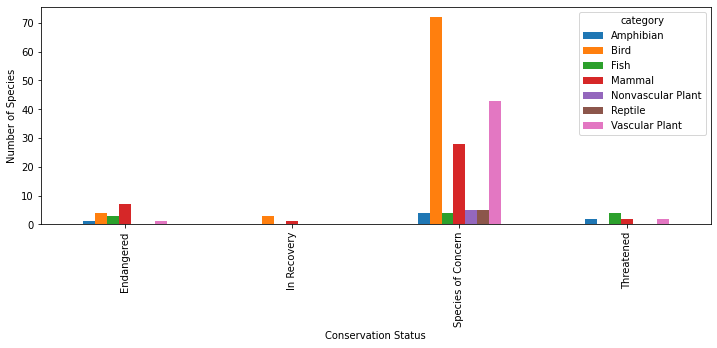

In [11]:
ax = conservationCategory.plot(kind='bar', figsize=(12,4))
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')

## Are some species categories more likely to be endangered than others?
To answer this question, we will first create a new column named `is_protected` that will be **True** for all species with a conservation status other than 'No Intervention'.

In [12]:
df_species['is_protected'] = df_species.conservation_status != 'No Intervention'

Now that we have this column, we can group our dataset based on the species categories and the protected status.

In [13]:
protected_category = df_species.groupby(['category','is_protected'])\
    .scientific_name.nunique()\
    .reset_index()\
    .pivot(columns='is_protected',
        index='category',
        values='scientific_name')\
        .reset_index()
protected_category.columns = ['category', 'not_protected', 'protected']

protected_category['protected_percent'] = protected_category.protected/\
    (protected_category.not_protected+protected_category.protected)*100
protected_category = protected_category.sort_values(by='protected_percent', ascending=False).reset_index()\
    .drop('index',axis=1)

protected_category

,category,not_protected,protected,protected_percent
0,Mammal,146,30,17.045455
1,Bird,413,75,15.368852
2,Amphibian,72,7,8.860759
3,Fish,115,11,8.730159
4,Reptile,73,5,6.410256
5,Nonvascular Plant,328,5,1.501502
6,Vascular Plant,4216,46,1.079305


In [14]:
print('Total not protected:', protected_category.not_protected.sum())
print('Total protected:', protected_category.protected.sum())

Total not protected: 5363
Total protected: 179


From this analysis we can see that about **17% of mammals** (30) and **15% of birds** (75) in the parks have a protected status.

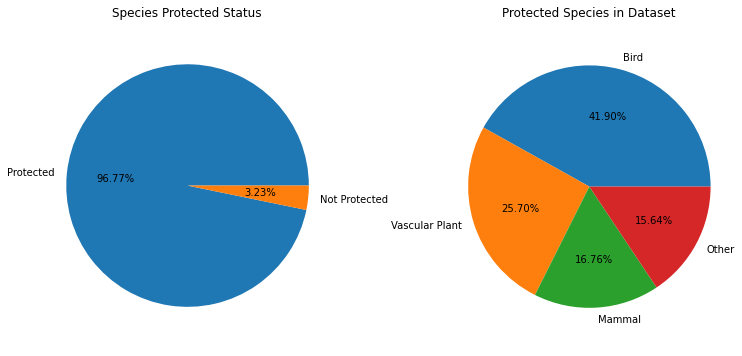

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
labels = ['Protected','Not Protected']
proportions = [5363,179]
plt.pie(proportions, labels=labels, autopct='%.2f%%')
plt.title('Species Protected Status')
plt.axis('equal')

plt.subplot(1,2,2)
labels = ['Bird','Vascular Plant','Mammal','Other']
proportions = [75,46,30,28]
plt.pie(proportions, labels=labels, autopct='%.2f%%')
plt.title('Protected Species in Dataset')
plt.axis('equal')

plt.subplots_adjust(wspace=0.5)
plt.show()

## Statistical significance
In order to determine if there is a significant statistical difference between the conservation status rates of the species categories, we will run a Chi Squared test and we can use the data in the table above as our contingency table.<br>
As a **significance threshold** we will use the standard value of **0.05**.<br>

In [16]:
from scipy.stats import chi2_contingency

In [17]:
chi2, pval, dof, expected = chi2_contingency([[413,75],[146,30]])
pval_birdmammal = pval
print('Chi Squared Contingency Test pval:',pval_birdmammal)

Chi Squared Contingency Test pval: 0.6875948096661336


Since **mammals** and **birds** are the two most protected categories and their protected percentages are also very close to each other in value, we will run the test on them.<br>
Running the test, we obtain a pvalue of ~0.68, which is much larger than our significance threshold of 0.05. Therefore, we can conclude there is not a significance difference in the protected status of Mammals and Birds.<br><br>
However, if we run the same test on **mammals** and **nonvascular plants**, we get a pvalue below our significance threshold, so we can say there is a signifficant difference in their protected status rates.

In [30]:
chi2, pval, dof, expected = chi2_contingency([[413,75],[328,5]])
pval_birdnonvasc = pval
print('Chi Squared Contingency Test pval:',pval_birdnonvasc)

Chi Squared Contingency Test pval: 1.0546306904975004e-10


## Most prevalent species
The next analysis will be based on the specialists observations of the species in the last 7 days.

To get a look at which are the most present species, we will first go back to the `species` dataset so we can extract their common names.

In [19]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_names = df_species[df_species.category == 'Bird'].common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

print(common_names[:6])

[['Brewsters', 'Warbler'], ['Coopers', 'Hawk'], ['Northern', 'Goshawk'], ['SharpShinned', 'Hawk'], ['Golden', 'Eagle'], ['RedTailed', 'Hawk']]


In [20]:
clean_rows = []

for row in common_names:
    clean_rows.append(list(set(row)))

print(clean_rows[:6])

[['Brewsters', 'Warbler'], ['Coopers', 'Hawk'], ['Northern', 'Goshawk'], ['SharpShinned', 'Hawk'], ['Golden', 'Eagle'], ['RedTailed', 'Hawk']]


In [21]:
clean_names = []

for l1 in clean_rows:
    for n in l1:
        clean_names.append(n)

print(clean_names[:6])

['Brewsters', 'Warbler', 'Coopers', 'Hawk', 'Northern', 'Goshawk']


Now that we have all the names of birds in a list, we can start countring their occurences. From this analysis we have found that the most prevalent bird species in our dataset are **Warblers**, with 59 common name mentions, followed by Sparrows, with 29 common name mentions.

Various Passeriformes are commonly referred to as warblers. They are not necessarily closely related to one another, but share some characteristics, such as being fairly small, vocal, and insectivorous. (__[Wikipedia](https://en.wikipedia.org/wiki/Warbler)__)

In [22]:
words_counted = []

for i in clean_names:
    x = clean_names.count(i)
    words_counted.append((i,x))

word_count = pd.DataFrame(set(words_counted),columns =['Word', 'Count'])\
    .sort_values("Count", ascending = False)

word_count.head(10)

,Word,Count
252,Warbler,59
311,Sparrow,29
434,American,21
6,Northern,20
307,Owl,18
112,Flycatcher,18
56,Common,18
201,Woodpecker,12
265,Western,12
38,Sandpiper,11


In our data, we have several scientific names referring to moss, and we will need to select those rows so we can further analyze the data. A new column will be created with a boolean value, to check if `is_warbler` is `True`.

In [23]:
df_species['is_warbler'] = df_species.common_names.str.contains(r"\bWarbler\b", regex = True)

df_species[df_species.is_warbler].head()

,category,scientific_name,common_names,conservation_status,is_protected,is_warbler
90,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,No Intervention,False,True
247,Bird,Dendroica caerulescens,Black-Throated Blue Warbler,No Intervention,False,True
248,Bird,Dendroica castanea,Bay-Breasted Warbler,No Intervention,False,True
249,Bird,Dendroica cerulea,Cerulean Warbler,No Intervention,False,True
250,Bird,Dendroica coronata,Yellow-Rumped Warbler,No Intervention,False,True


In [32]:
df_species[df_species.is_warbler].nunique()

category                1
scientific_name        59
common_names           39
conservation_status     3
is_protected            2
is_warbler              1
dtype: int64

Next we will merge the `warbler species subset` with the `observations` dataset.

In [24]:
warbler_observations = df_observations.merge(df_species[df_species.is_warbler])
warbler_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_warbler
0,Vermivora celata,Yosemite National Park,106,Bird,Orange-Crowned Warbler,No Intervention,False,True
1,Vermivora celata,Great Smoky Mountains National Park,76,Bird,Orange-Crowned Warbler,No Intervention,False,True
2,Vermivora celata,Yellowstone National Park,281,Bird,Orange-Crowned Warbler,No Intervention,False,True
3,Vermivora celata,Bryce National Park,121,Bird,Orange-Crowned Warbler,No Intervention,False,True
4,Setophaga dominica,Yosemite National Park,140,Bird,Yellow-Throated Warbler,No Intervention,False,True
...,...,...,...,...,...,...,...,...
231,Oreothlypis virginiae,Bryce National Park,84,Bird,Virginia's Warbler,No Intervention,False,True
232,Setophaga petechia,Great Smoky Mountains National Park,82,Bird,Yellow Warbler,No Intervention,False,True
233,Setophaga petechia,Yellowstone National Park,245,Bird,Yellow Warbler,No Intervention,False,True
234,Setophaga petechia,Bryce National Park,134,Bird,Yellow Warbler,No Intervention,False,True


In [33]:
warbler_protected = warbler_observations.groupby('is_protected')\
    .scientific_name.nunique()\
    .reset_index()
warbler_protected.columns = ['is_protected','num_species']
warbler_protected

,is_protected,num_species
0,False,56
1,True,3


We are now left with a subset containing 59 Warbler species, out of which 56 are not protected, and 3 are.

Now that we have the Warbler species and the observations put together, we can find out how many times were Warbler species observed in each national park in the last 7 days, and also further break down the observations based on the protected status of the species.

In [27]:
warbler_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,5760
1,Great Smoky Mountains National Park,4435
2,Yellowstone National Park,14487
3,Yosemite National Park,8712


In [35]:
print('Total observations:', warbler_observations.observations.sum())

Total observations: 33394


In [28]:
observations_warbler_park = warbler_observations.groupby(['park_name','is_protected'])\
    .observations.sum()\
    .reset_index()
observations_warbler_park

,park_name,is_protected,observations
0,Bryce National Park,False,5565
1,Bryce National Park,True,195
2,Great Smoky Mountains National Park,False,4290
3,Great Smoky Mountains National Park,True,145
4,Yellowstone National Park,False,13995
5,Yellowstone National Park,True,492
6,Yosemite National Park,False,8441
7,Yosemite National Park,True,271


Out of the total 33,394 observations, most Warbler observations of the last 7 days were made in the **Yellowstone National Park**, with **14,487 sightings** by specialists.

We can also plot this data so we can get a better feel of where the Warbler species were observed the most, as well as their protected status in each of the parks.

Text(0, 0.5, 'Observations')

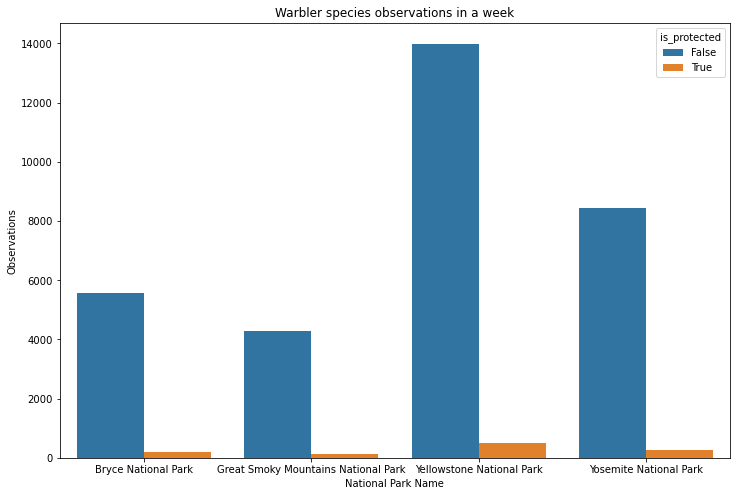

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(data=observations_warbler_park, x='park_name',y='observations',hue='is_protected')
plt.title('Warbler species observations in a week')
plt.xlabel('National Park Name')
plt.ylabel('Observations')

Observations of the protected species make up only a small proportion of the total sightings, at only 3.30%. This is lower than the proportion of protected species of Warblers, which is 5.08%. 

The National Parks Service might have to increase the efforts of preserving these species as the results might point out the fact that the endangered species are still struggling to maintain a healthy population.

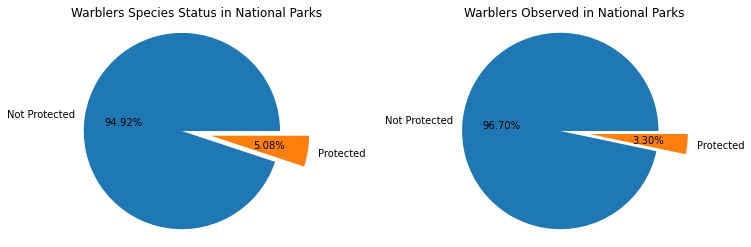

In [34]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
labels = ['Not Protected','Protected']
explode = (0,0.3)
plt.pie(warbler_protected.num_species, explode=explode, labels=labels, autopct='%.2f%%')
plt.axis('equal')
plt.title('Warblers Species Status in National Parks')

plt.subplot(1,2,2)
labels = ['Not Protected','Protected']
explode = (0,0.3)
plt.pie(warbler_observations.groupby('is_protected').observations.sum(), explode=explode, labels=labels, autopct='%.2f%%')
plt.axis('equal')
plt.title('Warblers Observed in National Parks')

plt.subplots_adjust(wspace=0.3)
plt.show()

# Results

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,363 vs 179)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and birds did not have significant difference in conservation percentage, mammals and nonvascular plants exhibited a statistically significant difference.
- Which birds are the most prevalent and what is their distribution amongst parks?
    - the study found that Warblers occurred the most number of times and they were most likely to be found in Yellowstone National Park.